# 0. Preliminaries

In [ ]:
from google.colab import drive
import os
if not os.path.exists('/gd'):
    drive.mount('/gd')

Mounted at /gd


In [ ]:
import locale
def gpe(x=None):
    return "UTF-8"
locale.getpreferredencoding = gpe

In [ ]:
!pip install transformers==4.33 sentencepiece datasets sacremoses sacrebleu  -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 123.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.33.0 which is incompatible.


# 1. Exploring the data


In [ ]:
import pandas as pd

In [ ]:
trans_df = pd.read_csv('/content/ckt-ru_filtered.csv', sep=";")
print(trans_df.shape)
print(trans_df.columns)

(67258, 2)
Index(['ckt', 'ru'], dtype='object')


In [ ]:
trans_df

,ckt,ru
0,Ръэв ынкъам ӄораны,Кит и олень
1,"Аӈӄачормэпы нылеӄин ӄораӈы, ръэв-ым аӈӄайпы ны...","Олень шел по берегу моря, и кит крикнул:"
2,- Китаӄун мынтэйкэвмык.,давай сразимся.
3,- Ээ!,- Хорошо!
4,Мынтэйкэвмык!,Давай сразимся
...,...,...
67253,Чьумэт энмэч чьоматкоёлгэпы алва гэнлелинэт.,Фигуры уже были убраны с шахматной доски.
67254,Чьумэт,Шахматы.
67255,"А'мын анны, лымӈэ ынӄэнат чьумэт!","о, это ещё шахматы!"
67256,Илюльэтык,"заниматься спортом, тренироваться"


In [ ]:
pd.options.display.max_colwidth = 100

In [ ]:
trans_df.sample(10)

,ckt,ru
54560,Альокэгты вальын,Незаметный
57268,Ытръэтти,Последние.
37696,пычегтывак,разуваться
66319,Левтыӈыттык,Ударять в голову
33366,пэвиԓӄу,олень с широкими концами рогов
48356,Тэминӈыкынъюԓьын,Опытная нянька
23477,Энагнэнтыткогыргын торвытаткэн,Жертвенное приношение первому появлению листьев
564,Тъэрӈэлвыльыльэ эккэт ивнинэт:,Бедняк говорит своим сыновьям:
55706,О'ратгыргын,Рождение.
2953,"Ӈэлвылти нын чеэкэевӄинэт вытатыӈок, эрмэвыплытку ӄэюут.","Самок и самцов соединят только в июле, когда первые телята окрепнут."


In [ ]:
trans_df.isnull().sum()

,0
ckt,0
ru,1


In [ ]:
trans_df.value_counts()

,,count
ckt,ru,
ӈытэтык,Отрываться,2
Рамык,Вымирать,2
Кытъаткэӈ,Очень неприятно,2
ӈыроек,Убивать трёх,2
Четлянка,мелкий сиг,2
...,...,...
Ныԓгинэрмъэв тыркыпԓын,Я его ударил очень сильно,1
Ныԓгинымэԓьэв тааӈыткоркын,Превосходно подражает,1
Ныԓгинымэйӈъэв ӄуԓиԓьэтыркын,Очень громко кричит,1


In [ ]:
trans_df = trans_df.sample(frac=1, random_state=42).reset_index(drop=True)

df_dev = trans_df.iloc[:500].copy()
df_train = trans_df.iloc[500:].copy()

# 2. How well does the data fit into a NLLB tokenizer?

In [ ]:
from transformers import NllbTokenizer
from tqdm.auto import tqdm, trange

In [ ]:
tokenizer = NllbTokenizer.from_pretrained('facebook/nllb-200-distilled-600M')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

In [ ]:
import re

def word_tokenize(text):
    return re.findall('(\w+|[^\w\s])', text)

In [ ]:
smpl = df_train.sample(10000, random_state=1)

smpl['rus_toks'] = smpl.ru.apply(tokenizer.tokenize)
smpl['ckt_toks'] = smpl.ckt.apply(tokenizer.tokenize)

smpl['rus_words'] = smpl.ru.apply(word_tokenize)
smpl['ckt_words'] = smpl.ckt.apply(word_tokenize)

In [ ]:
smpl.sample(5)[['ckt', 'ckt_words', 'ckt_toks', 'ru', 'rus_words', 'rus_toks']]

,ckt,ckt_words,ckt_toks,ru,rus_words,rus_toks
55301,ръаԓё,[ръаԓё],"[▁ръ, а, ԓ, ё]",смешивать,[смешивать],"[▁сме, ши, вать]"
21190,Ынӄэн эмлычеӈӄан нылгэгырголятӄэн,"[Ынӄэн, эмлычеӈӄан, нылгэгырголятӄэн]","[▁Ы, н, ӄ, эн, ▁эм, лы, че, ӈӄ, ан, ▁ны, л, гэ, гы, р, го, лят, ӄ, эн]",Фонтан поднимался очень высоко,"[Фонтан, поднимался, очень, высоко]","[▁Ф, он, тан, ▁под, нима, лся, ▁очень, ▁высо, ко]"
5324,Рытэнмавык,[Рытэнмавык],"[▁Р, ы, тэн, ма, вы, к]",Взять верх над кем-л.,"[Взять, верх, над, кем, -, л, .]","[▁В, зя, ть, ▁верх, ▁над, ▁кем, -, л, .]"
65286,"Ы'твэрмэчьэ ивык, тыченрыгчавык.","[Ы, ', твэрмэчьэ, ивык, ,, тыченрыгчавык, .]","[▁Ы, ', т, вэр, м, э, чь, э, ▁и, вы, к, ,, ▁ты, чен, рыг, ча, вы, к, .]",Хозяин лодки мне сказал об этом и я стал ждать в нетерпении.,"[Хозяин, лодки, мне, сказал, об, этом, и, я, стал, ждать, в, нетерпении, .]","[▁Хо, зя, ин, ▁ло, дки, ▁мне, ▁сказал, ▁об, ▁этом, ▁и, ▁я, ▁стал, ▁ж, дать, ▁в, ▁не, тер, п, ени..."
3685,Вэлер киткит кымэӈэты нылпынрыткон ыпляата.,"[Вэлер, киткит, кымэӈэты, нылпынрыткон, ыпляата, .]","[▁В, э, лер, ▁ки, тки, т, ▁кы, м, э, ӈ, э, ты, ▁ны, л, пын, ры, т, кон, ▁ы, пля, ата, .]",Пусть по крайней мере даст немного муки для ребёнка.,"[Пусть, по, крайней, мере, даст, немного, муки, для, ребёнка, .]","[▁Пу, сть, ▁по, ▁край, ней, ▁мере, ▁даст, ▁немного, ▁му, ки, ▁для, ▁реб, ён, ка, .]"


In [ ]:
stats = smpl[['rus_toks', 'ckt_toks', 'rus_words', 'ckt_words']].applymap(len).describe()
stats

<ipython-input-19-1719334008>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stats = smpl[['rus_toks', 'ckt_toks', 'rus_words', 'ckt_words']].applymap(len).describe()


,rus_toks,ckt_toks,rus_words,ckt_words
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.371200,14.285300,4.876400,3.284300
std,9.243676,14.960518,5.200887,4.038874
min,1.000000,1.000000,1.000000,1.000000
25%,4.000000,6.000000,2.000000,1.000000
50%,7.000000,9.000000,3.000000,2.000000
75%,12.000000,19.000000,6.000000,4.000000
max,217.000000,254.000000,99.000000,105.000000


In [ ]:
print(stats.rus_toks['mean'] / stats.rus_words['mean'])
print(stats.ckt_toks['mean'] / stats.ckt_words['mean'])

1.9217455499958984
4.349572207167433


In [ ]:
print(tokenizer.unk_token, tokenizer.unk_token_id)

<unk> 3


In [ ]:
texts_with_unk = [text for text in tqdm(trans_df.ckt) if tokenizer.unk_token_id in tokenizer(text).input_ids]
print(len(texts_with_unk))

  0%|          | 0/67258 [00:00<?, ?it/s]

46294


In [ ]:
import random
s = random.sample(texts_with_unk, 5)
s

['Наӄам лым',
 'Ытлён гакоргытвэлен, гэӄитпэвлин.',
 "Э'ӈкыкватык ",
 'Пэнрыткоԓьыт атчамыӈ ныԓеӄинэт',
 'Ӈаргынэн']

In [ ]:
import re
import sys
import typing as tp
import unicodedata
from sacremoses import MosesPunctNormalizer

mpn = MosesPunctNormalizer(lang="en")
mpn.substitutions = [
    (re.compile(r), sub) for r, sub in mpn.substitutions
]

def get_non_printing_char_replacer(replace_by: str = " ") -> tp.Callable[[str], str]:
    non_printable_map = {
        ord(c): replace_by
        for c in (chr(i) for i in range(sys.maxunicode + 1))
        if unicodedata.category(c) in {"C", "Cc", "Cf", "Cs", "Co", "Cn"}
    }

    def replace_non_printing_char(line) -> str:
        return line.translate(non_printable_map)

    return replace_non_printing_char

replace_nonprint = get_non_printing_char_replacer(" ")

def preproc(text):
    clean = mpn.normalize(text)
    clean = replace_nonprint(clean)
    clean = unicodedata.normalize("NFKC", clean)
    return clean

In [ ]:
texts_with_unk_normed = [text for text in tqdm(texts_with_unk) if tokenizer.unk_token_id in tokenizer(preproc(text)).input_ids]
print(len(texts_with_unk_normed))

  0%|          | 0/46294 [00:00<?, ?it/s]

46294


# 3 Expanding the vocabulary

# 4. Adding a new language tag to the tokenizer and model

In [ ]:
from transformers import AutoModelForSeq2SeqLM
from transformers import NllbTokenizer

In [ ]:
tokenizer = NllbTokenizer.from_pretrained('facebook/nllb-200-distilled-600M')
print(len(tokenizer))
print(tokenizer.convert_ids_to_tokens([256202, 256203]))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


256204
['zul_Latn', '<mask>']


In [ ]:
def fix_tokenizer(tokenizer, new_lang='ckt_Cyrl'):
    old_len = len(tokenizer) - int(new_lang in tokenizer.added_tokens_encoder)
    tokenizer.lang_code_to_id[new_lang] = old_len-1
    tokenizer.id_to_lang_code[old_len-1] = new_lang
    tokenizer.fairseq_tokens_to_ids["<mask>"] = len(tokenizer.sp_model) + len(tokenizer.lang_code_to_id) + tokenizer.fairseq_offset

    tokenizer.fairseq_tokens_to_ids.update(tokenizer.lang_code_to_id)
    tokenizer.fairseq_ids_to_tokens = {v: k for k, v in tokenizer.fairseq_tokens_to_ids.items()}
    if new_lang not in tokenizer._additional_special_tokens:
        tokenizer._additional_special_tokens.append(new_lang)
    tokenizer.added_tokens_encoder = {}
    tokenizer.added_tokens_decoder = {}

In [ ]:
fix_tokenizer(tokenizer)

In [ ]:
print(tokenizer.convert_ids_to_tokens([256202, 256203, 256204]))
print(tokenizer.convert_tokens_to_ids(['zul_Latn', 'ckt_Cyrl', '<mask>']))

['zul_Latn', 'ckt_Cyrl', '<mask>']
[256202, 256203, 256204]


In [ ]:
added_token_id = tokenizer.convert_tokens_to_ids('ckt_Cyrl')
similar_lang_id = tokenizer.convert_tokens_to_ids('kir_Cyrl')
print(added_token_id, similar_lang_id)

256203 256095


In [ ]:
model = AutoModelForSeq2SeqLM.from_pretrained('facebook/nllb-200-distilled-600M')
model.resize_token_embeddings(len(tokenizer))

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embedding dimension will be 256205. This might induce some performance reduction as *Tensor Cores* will not be available. For more details about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


Embedding(256205, 1024)

In [ ]:
model.model.shared.weight.data[added_token_id+1] = model.model.shared.weight.data[added_token_id]
model.model.shared.weight.data[added_token_id] = model.model.shared.weight.data[similar_lang_id]

# 5. Preparing the training loop

In [ ]:
import gc
import random
import numpy as np
import torch
from tqdm.auto import tqdm, trange
from transformers.optimization import Adafactor
from transformers import get_constant_schedule_with_warmup

def cleanup():
    """Try to free GPU memory"""
    gc.collect()
    torch.cuda.empty_cache()

cleanup()

In [ ]:
model.cuda();

In [ ]:
optimizer = Adafactor(
    [p for p in model.parameters() if p.requires_grad],
    scale_parameter=False,
    relative_step=False,
    lr=1e-4,
    clip_threshold=1.0,
    weight_decay=1e-3,
)

In [ ]:
batch_size = 16
max_length = 128
warmup_steps = 1_000
training_steps = 57000

In [ ]:
losses = []
scheduler = get_constant_schedule_with_warmup(optimizer, num_warmup_steps=warmup_steps)

In [ ]:
LANGS = [('ru', 'rus_Cyrl'), ('ckt', 'ckt_Cyrl')]

def get_batch_pairs(batch_size, data=df_train):
    (l1, long1), (l2, long2) = random.sample(LANGS, 2)
    xx, yy = [], []
    for _ in range(batch_size):
        item = data.iloc[random.randint(0, len(data)-1)]
        xx.append(preproc(item[l1]))
        yy.append(preproc(item[l2]))
    return xx, yy, long1, long2

print(get_batch_pairs(1))

(['пыԓгытратыԓьын'], ['низко прилегший к земле'], 'ckt_Cyrl', 'rus_Cyrl')


In [ ]:
MODEL_SAVE_PATH = '/gd/MyDrive/models/nllb-rus-ckt-v1'

# 6. The training loop

In [ ]:
model.train()
x, y, loss = None, None, None
cleanup()

tq = trange(len(losses), training_steps)
for i in tq:
    xx, yy, lang1, lang2 = get_batch_pairs(batch_size)
    try:
        tokenizer.src_lang = lang1
        x = tokenizer(xx, return_tensors='pt', padding=True, truncation=True, max_length=max_length).to(model.device)
        tokenizer.src_lang = lang2
        y = tokenizer(yy, return_tensors='pt', padding=True, truncation=True, max_length=max_length).to(model.device)
        y.input_ids[y.input_ids == tokenizer.pad_token_id] = -100

        loss = model(**x, labels=y.input_ids).loss
        loss.backward()
        losses.append(loss.item())

        optimizer.step()
        optimizer.zero_grad(set_to_none=True)
        scheduler.step()

    except RuntimeError as e:
        optimizer.zero_grad(set_to_none=True)
        x, y, loss = None, None, None
        cleanup()
        print('error', max(len(s) for s in xx + yy), e)
        continue

    if i % 1000 == 0:
        print(i, np.mean(losses[-1000:]))

    if i % 1000 == 0 and i > 0:
        model.save_pretrained(MODEL_SAVE_PATH)
        tokenizer.save_pretrained(MODEL_SAVE_PATH)

  0%|          | 0/57000 [00:00<?, ?it/s]

0 7.182535171508789
1000 3.8470102081298827
2000 3.0655537333488465
3000 2.776056939125061
4000 2.5747734618186953
5000 2.430811467289925
6000 2.303928099274635
7000 2.20495334482193
8000 2.1165685307979585
9000 2.019858345270157
10000 1.956656931757927
11000 1.8764722429513931
12000 1.8177066801786423
13000 1.7730598180294037
14000 1.716019427061081
15000 1.6623855455517769
16000 1.627084607541561
17000 1.5693917751908302
18000 1.5306519513726236
19000 1.5155920132994651
20000 1.4644866771101952
21000 1.4335805599689484
22000 1.3945199801921844
23000 1.3624670080542565
24000 1.3159924359321595
25000 1.287443321943283
26000 1.262423547387123
27000 1.2193432980775833
28000 1.199033952653408
29000 1.1763853381872178
30000 1.1425098757743835
31000 1.1320351648330689
32000 1.1101082386672496
33000 1.0703461080491543
34000 1.043714356571436
35000 1.0321930273473263
36000 1.000326783299446
37000 0.9791405644118786
38000 0.9611645402014255
39000 0.932087317109108
40000 0.916582081079483
41000

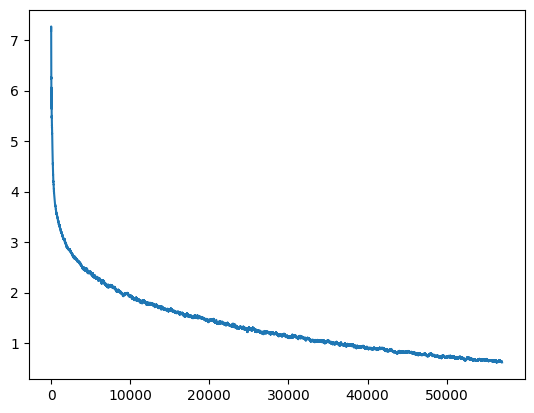

In [ ]:
pd.Series(losses).ewm(100).mean().plot();

In [ ]:
def translate(text, src_lang='rus_Cyrl', tgt_lang='ckt_Cyrl', a=16, b=1.5, max_input_length=1024, **kwargs):
    tokenizer.src_lang = src_lang
    tokenizer.tgt_lang = tgt_lang
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=max_input_length)
    result = model.generate(
        **inputs.to(model.device),
        forced_bos_token_id=tokenizer.convert_tokens_to_ids(tgt_lang),
        max_new_tokens=int(a + b * inputs.input_ids.shape[1]),
        **kwargs
    )
    return tokenizer.batch_decode(result, skip_special_tokens=True)

In [ ]:
xx, yy, lang1, lang2 = get_batch_pairs(1, data=df_dev)
print(xx)
print(yy)
model.eval()
print(translate(xx[0], lang1, lang2, no_repeat_ngram_size=3, num_beams=5))

['Танныӈын']
['Рыбалка.']
['Коренной зуб.']


In [ ]:
!ls -alsh $MODEL_SAVE_PATH

total 2.3G
1.0K -rw------- 1 root root  896 Jun 13 21:26 config.json
 512 -rw------- 1 root root  184 Jun 13 21:26 generation_config.json
2.3G -rw------- 1 root root 2.3G Jun 13 21:26 pytorch_model.bin
4.7M -rw------- 1 root root 4.7M Jun 13 21:26 sentencepiece.bpe.model
3.5K -rw------- 1 root root 3.5K Jun 13 21:26 special_tokens_map.json
1.0K -rw------- 1 root root  570 Jun 13 21:26 tokenizer_config.json


### Для графика:

In [ ]:
import json

log_data = []
for i, loss in enumerate(losses):
    if loss is not None:
        log_data.append({
            "Step": i + 1,
            "Training_Loss": loss,
            "Validation_Loss": None
        })

with open("/content/losses_nllb_rus_ckt.json", "w") as f:
    json.dump(log_data, f, indent=2)

# Publishing the model to HF

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
The token `chukchi` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when p

In [ ]:
from transformers import NllbTokenizer, AutoModelForSeq2SeqLM, AutoConfig

In [ ]:
model_load_name = '/gd/MyDrive/models/nllb-rus-ckt-v1'
model = AutoModelForSeq2SeqLM.from_pretrained(model_load_name)
tokenizer = NllbTokenizer.from_pretrained(model_load_name)
fix_tokenizer(tokenizer)

upload_repo = "HSE-Chukchi-NLP/nllb-rus-ckt-v1"
tokenizer.push_to_hub(upload_repo)
model.push_to_hub(upload_repo)

MODEL_URL = 'HSE-Chukchi-NLP/nllb-rus-ckt-v1'
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_URL)
tokenizer = NllbTokenizer.from_pretrained(MODEL_URL, force_download=True)
fix_tokenizer(tokenizer)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/898 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.56k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
